생성 적대적 신경망

In [9]:
from keras.layers import Dense, Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.models import Sequential

In [10]:
gn_m = Sequential()
gn_m.add(Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
gn_m.add(Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
gn_m.add(Dense(28 * 28, activation = 'sigmoid'))
gn_m.add(Reshape((28, 28)))

In [11]:
di_m = Sequential()
di_m.add(Flatten())
di_m.add(Dense(150, activation = 'relu', kernel_initializer = 'he_normal'))
di_m.add(Dense(100, activation = 'relu', kernel_initializer = 'he_normal'))
di_m.add(Dense(1, activation = 'sigmoid'))

In [12]:
gan = Sequential([gn_m, di_m])

In [13]:
di_m.compile(loss = 'binary_crossentropy')
di_m.trainable = False
gan.compile(loss = 'binary_crossentropy')

In [14]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()
s_train_x = train_x.astype('float32')/ 255.
s_test_x = test_x.astype('float32')/255.
s_test_x.min(), s_test_x.max()

(0.0, 1.0)

X -> z

In [15]:
import tensorflow as tf
dataset = tf.data.Dataset.from_tensor_slices(s_test_x).shuffle(1000)
dataset = dataset.batch(32, drop_remainder = True).prefetch(1)

In [16]:
import matplotlib.pyplot as plt
def m_img_show(imgs, n_c = None):
    img_n_c = n_c or len(imgs)
    img_n_r = (len(imgs) - 1) // n_c + 1
    if imgs.shape[-1] == 1:
        imgs = imgs.squeeze(axis = -1)
    plt.figure(figsize = (img_n_c, img_n_r))
    for idx, im in enumerate(imgs):
        plt.subplot(img_n_r, img_n_c, idx + 1)
        plt.imshow(im, cmap = 'binary')
        plt.axis('off')

1 / 10회


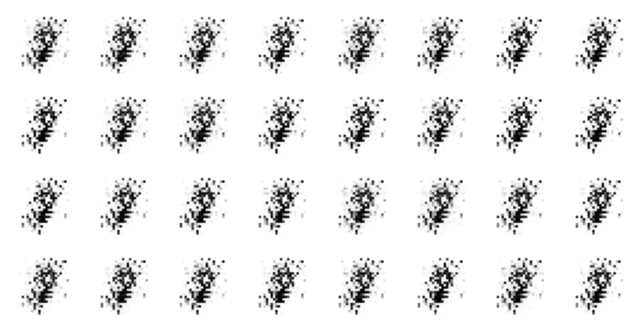

2 / 10회


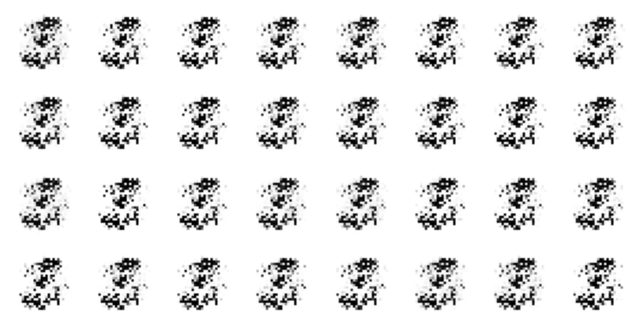

3 / 10회


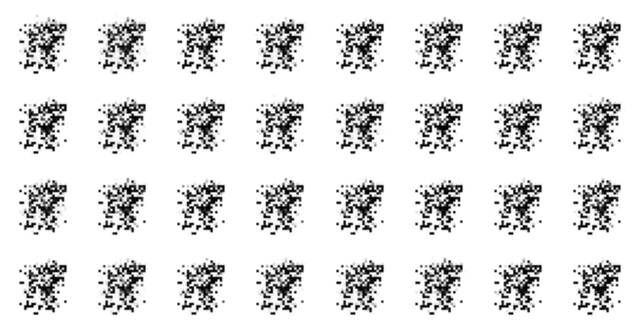

4 / 10회


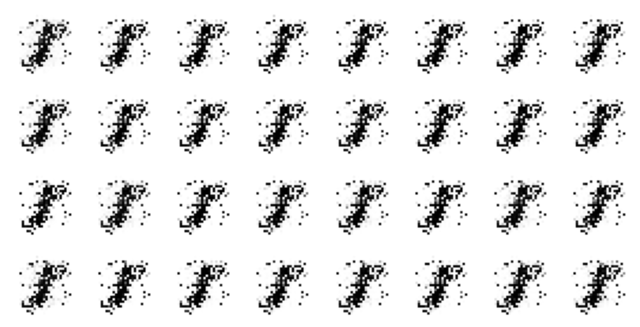

5 / 10회


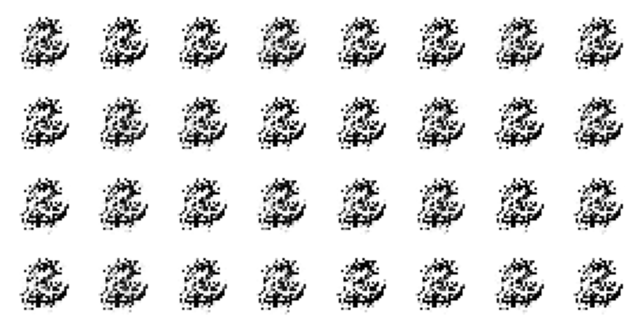

6 / 10회


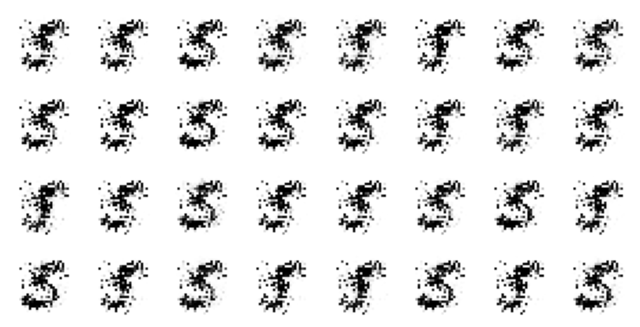

7 / 10회


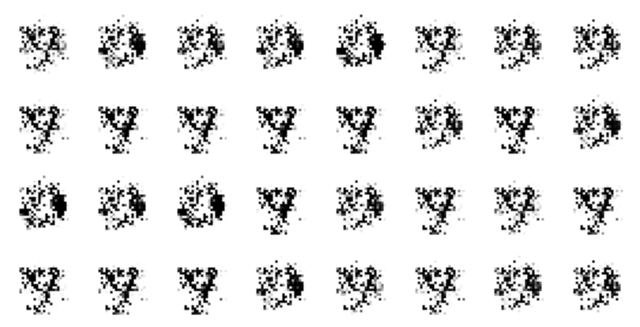

8 / 10회


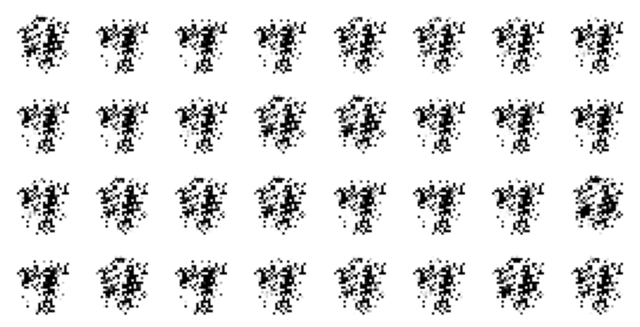

9 / 10회


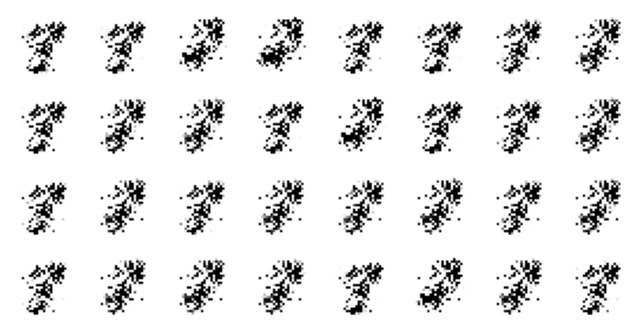

10 / 10회


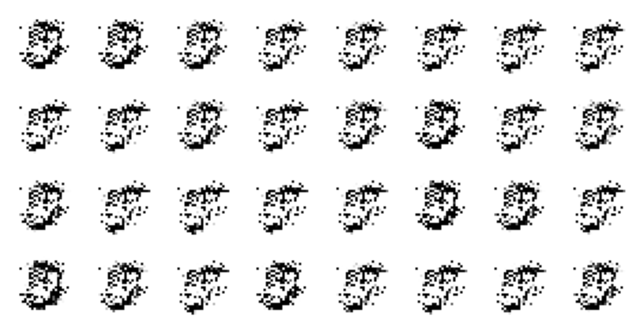

In [17]:
def train_g(m, data, b_size, c_size, ec):
    gn_m, di_m = m.layers
    for i in range(ec):
        print(f'{i + 1} / {ec}회')
        for x in data:
            # 1. 판별자 학습
            noise = tf.random.normal([b_size, c_size]) # z
            g_img = gn_m(noise)
            f_t_x = tf.concat([g_img, x], axis = 0)
            y1 = tf.constant([[0.]] * b_size + [[1.]] * b_size)
            di_m.train_on_batch(f_t_x, y1)
            # 2. 생성자 학습
            noise = tf.random.normal([b_size, c_size]) # z
            y2 = tf.constant([[1.]] * b_size)
            gan.train_on_batch(noise, y2)
        m_img_show(g_img.numpy(), 8)
        plt.show()
train_g(gan, dataset, 32, 30, 10)

Q. GAN을 이용하여 패션 mnist를 생성

In [18]:
from keras.datasets import fashion_mnist
(tr_x,tr_y),(tt_x,tt_y)=fashion_mnist.load_data()
s_tr_x=tr_x.astype('float32')/255
s_tt_x=tt_x.astype('float32')/255

In [19]:
gn_m=Sequential()#생성자
gn_m.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
gn_m.add(Dense(150,activation='relu',kernel_initializer='he_normal'))
gn_m.add(Dense(28*28,activation='sigmoid'))
gn_m.add(Reshape((28,28)))

In [20]:
di_m=Sequential()#판별자
di_m.add(Flatten())
di_m.add(Dense(150,activation='relu',kernel_initializer='he_normal'))
di_m.add(Dense(100,activation='relu',kernel_initializer='he_normal'))
di_m.add(Dense(1,activation='sigmoid'))

In [21]:
gan=Sequential([gn_m,di_m])

In [22]:
di_m.compile(loss='binary_crossentropy')
di_m.trainable=False
gan.compile(loss='binary_crossentropy')

In [23]:
dataset=tf.data.Dataset.from_tensor_slices(s_tr_x).shuffle(1000)
dataset=dataset.batch(32,drop_remainder=True).prefetch(1)

1/10회


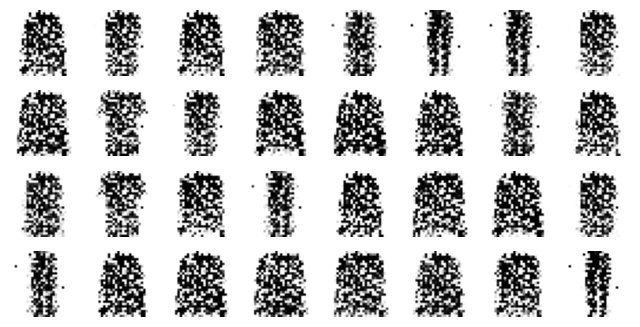

2/10회


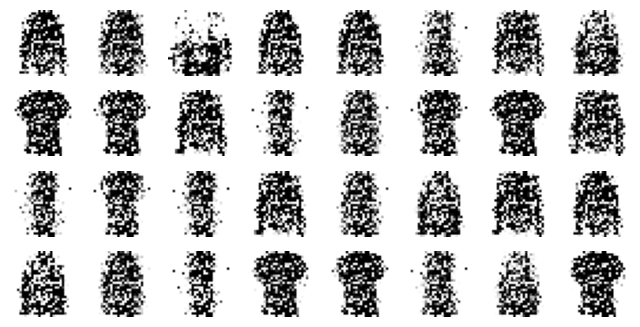

3/10회


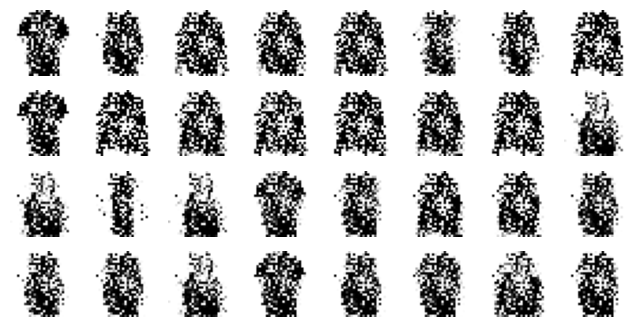

4/10회


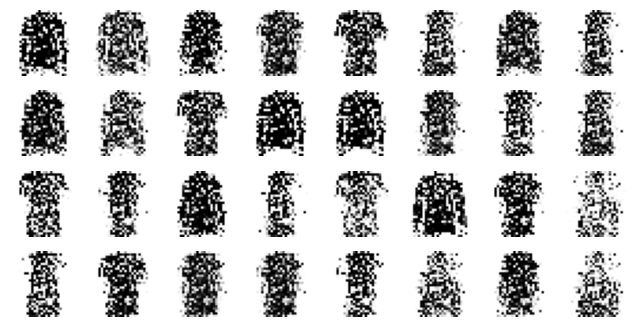

5/10회


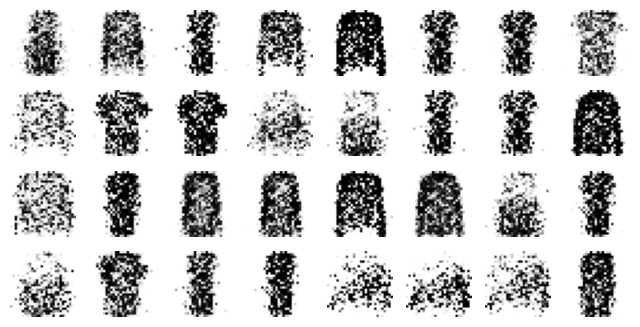

6/10회


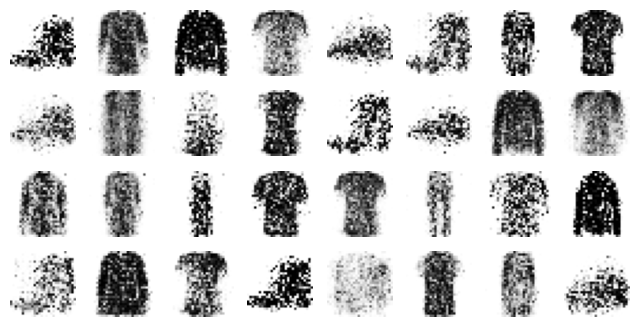

7/10회


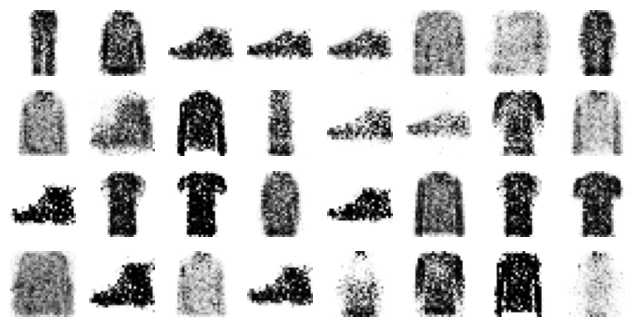

8/10회


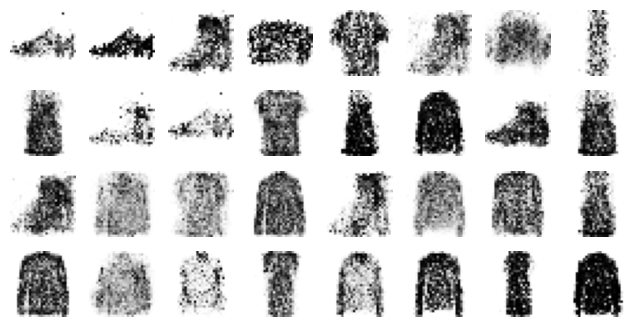

9/10회


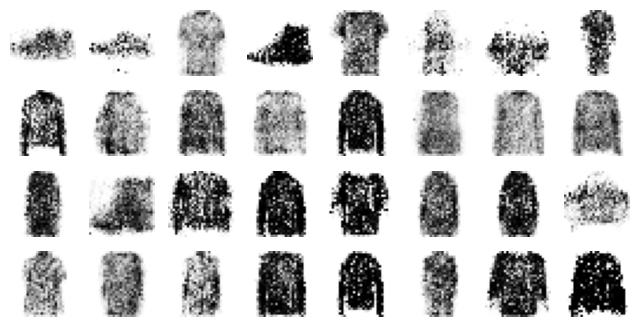

10/10회


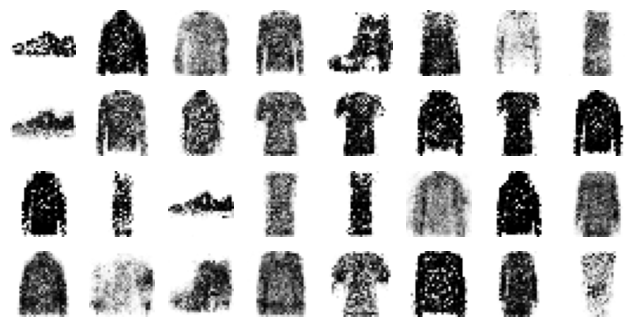

In [24]:
def train_g(m,data,b_size,c_size,ec):
  gn_m,di_m=m.layers
  for i in range(ec):
    print(f'{i+1}/{ec}회')
    for x in data:
      #1.판별자 학습
      noise = tf.random.normal([b_size,c_size])#z
      g_img = gn_m(noise)
      f_t_x=tf.concat([g_img,x],axis=0)
      y1=tf.constant([[0.]]*b_size+[[1.]]*b_size)
      di_m.train_on_batch(f_t_x,y1)
      #2.생성자 학습
      noise = tf.random.normal([b_size,c_size])#z
      y2=tf.constant([[1.]]*b_size)
      gan.train_on_batch(noise,y2)
    m_img_show(g_img.numpy(),8)
    plt.show()
train_g(gan,dataset,32,30,10)

In [25]:
from keras.layers import Dense, Conv2D,Conv2DTranspose,Reshape,Flatten
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt

def m_img_show(imgs,n_c=None):
  img_n_c=  n_c or len(imgs)
  img_n_r=(len(imgs)-1)//n_c+1
  if imgs.shape[-1]==1:
    imgs=imgs.squeeze(axis=-1)
  plt.figure(figsize=(img_n_c,img_n_r))
  for idx,im in enumerate(imgs):
    plt.subplot(img_n_r,img_n_c,idx+1)
    plt.imshow(im,cmap='binary')
    plt.axis('off')

In [26]:
from keras.datasets import fashion_mnist
(tr_x,tr_y),(tt_x,tt_y)=fashion_mnist.load_data()
s_tr_x=tr_x.astype('float32')/255
s_tt_x=tt_x.astype('float32')/255

In [27]:
(s_tt_x.reshape(-1,28,28,1)*2.-1).shape
(s_tt_x.reshape(-1,28,28,1)*2.-1).min(),(s_tt_x.reshape(-1,28,28,1)*2.-1).max()

(-1.0, 1.0)

In [28]:
dc_g_tr_x=s_tr_x.reshape(-1,28,28,1)*2.-1
dc_g_tt_x=s_tt_x.reshape(-1,28,28,1)*2.-1
dc_g_tr_x.min(),dc_g_tr_x.max()

(-1.0, 1.0)

In [29]:
tr_dataset=tf.data.Dataset.from_tensor_slices(dc_g_tr_x).shuffle(1000)
tr_dataset=tr_dataset.batch(32,drop_remainder=True).prefetch(1)

In [ ]:
tt_dataset=tf.data.Dataset.from_tensor_slices(dc_g_tt_x).shuffle(1000)
tt_dataset=tt_dataset.batch(32,drop_remainder=True).prefetch(1)

In [ ]:
dc_gn_m=Sequential()#생성자
dc_gn_m.add(Dense(7*7*128))
dc_gn_m.add(Reshape((7,7,128)))
dc_gn_m.add(BatchNormalization())
dc_gn_m.add(Conv2DTranspose(64,5,2,'same',activation='relu'))
dc_gn_m.add(BatchNormalization())
dc_gn_m.add(Conv2DTranspose(1,5,2,'same',activation='tanh'))

In [ ]:
from keras.layers import LeakyReLU,Dropout,BatchNormalization

In [ ]:
dc_di_m=Sequential()#판별자<분류기>
dc_di_m.add(Conv2D(64,5,strides=2,padding='same',activation=LeakyReLU(0.2)))
dc_di_m.add(Dropout(0.4))
dc_di_m.add(Conv2D(128,5,strides=2,padding='same',activation=LeakyReLU(0.2)))
dc_di_m.add(Dropout(0.4))
dc_di_m.add(Flatten())
dc_di_m.add(Dense(1,activation='sigmoid'))

In [ ]:
dcgan=Sequential([dc_gn_m,dc_di_m])

In [ ]:
dc_di_m.compile(loss='binary_crossentropy')
dc_di_m.trainable=False
dcgan.compile(loss='binary_crossentropy')

In [ ]:
def train_dcg(m,data,b_size,c_size,ec):
  gn_m,di_m=m.layers
  for i in range(ec):
    print(f'{i+1}/{ec}회')
    for x in data:
      #1.판별자 학습
      noise = tf.random.normal([b_size,c_size])#z
      g_img = gn_m(noise)
      f_t_x=tf.concat([g_img,x],axis=0)
      y1=tf.constant([[0.]]*b_size+[[1.]]*b_size)
      di_m.train_on_batch(f_t_x,y1)
      #2.생성자 학습
      noise = tf.random.normal([b_size,c_size])#z
      y2=tf.constant([[1.]]*b_size)
      dcgan.train_on_batch(noise,y2)
    m_img_show(g_img.numpy(),8)
    plt.show()
train_dcg(dcgan,tt_dataset,32,100,10)